In [1]:
!pip install qiskit

    100% |████████████████████████████████| 7.3MB 901kB/s 
    100% |████████████████████████████████| 18.5MB 1.5MB/s 
    100% |████████████████████████████████| 5.9MB 2.9MB/s 
    100% |████████████████████████████████| 51kB 18.5MB/s 
    100% |████████████████████████████████| 51kB 17.9MB/s 
    100% |████████████████████████████████| 61kB 21.7MB/s 
    100% |████████████████████████████████| 2.0MB 11.8MB/s 
    100% |████████████████████████████████| 2.4MB 8.6MB/s 
    100% |████████████████████████████████| 102kB 23.0MB/s 
  Running setup.py clean for qiskit
  Stored in directory: /root/.cache/pip/wheels/6c/59/86/478e3c0f298368c119095cc5985dedac57c0e35a85c737f823
Successfully built sympy
Failed to build qiskit
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
google-colab 0.0.1a1 has requirement requests~=2.18.0, but you'll have requests 2.21.0 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotl

**Exercise: The Teleportation Circuit**

Quantum teleportation is a technique for moving quantum states around, even in the abscence of a quantum communications channel linking the sender of the quantum state to the recipient. 

To perform this, a 3-qubit system is required. The first qubit is the message and the next two are the entangled qubits. The 'message' qubit can be prepared in an arbitrary state. Then, the last two qubits are entangled using the C-NOT gate.

A second C-NOT gate is applied with the control qubit as the 'message' qubit and the target qubit as the second qubit. This allows the second qubit to interact with the 'message' qubit. 

A Hadamard gate is applied to the 'message' qubit. Next, the action of the controlled-X and controlled-Z gate transforms the third qubit into the same state as the 'message' qubit. 

NOTE: the state of the 'message' qubit is changed in this process.



Algebraic evaluation of the circuit: 

The state of the message qubit is given by: 

$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle $$

After a Bell Pair is created with the second and third qubit, the state of the system of qubits is given by:

$$(\alpha|0\rangle + \beta|1\rangle)\otimes(\frac{|00\rangle + |11\rangle}{\sqrt{2}}) $$
$$ = \frac{1}{\sqrt{2}}(\alpha[|000\rangle)+|011\rangle] + \beta[|100\rangle + |111\rangle] )$$ 

Applying the second C-NOT gate:

$$ = \frac{1}{\sqrt{2}}(\alpha[|000\rangle+|011\rangle] + \beta[|110\rangle + |101\rangle] )$$ 
$$ = \frac{1}{\sqrt{2}}(\alpha|000\rangle+\alpha|011\rangle + \beta|110\rangle + \beta|101\rangle)$$ 

After some factorisation:

$$ = \frac{1}{\sqrt{2}}(\alpha|0\rangle\otimes[|00\rangle+|11\rangle] + \beta|1\rangle \otimes[|10\rangle + |01\rangle])$$ 

Applying the Hadamard gate to the first qubit:

$$ = \frac{1}{\sqrt{2}}(\alpha[\frac{|0\rangle + |1\rangle}{\sqrt{2}}]\otimes[|00\rangle +|11\rangle] + \beta[\frac{|0\rangle - |1\rangle}{\sqrt{2}}] \otimes[|10\rangle+|10\rangle]$$

$$ = \frac{1}{2}[\alpha|000\rangle + \alpha|011\rangle + \alpha|100\rangle + \alpha|111\rangle + \beta|010\rangle + \beta|001\rangle + \beta|110\rangle+ \beta|010\rangle ]$$

After some factorisation:

$$ = \frac{1}{2}[|00\rangle\otimes(\alpha|0\rangle + \beta|1\rangle) +|01\rangle\otimes(\alpha|1\rangle +\beta|0\rangle) + |10\rangle\otimes(\alpha|0\rangle - \beta|1\rangle) +  |11 \rangle\otimes(\alpha|1\rangle - \beta|0\rangle)]$$

It can be seen that if the first two qubits are found to be in $|00\rangle$, only the identity gate needs to be applied to the third qubit to transform the third qubit into $|\psi\rangle$.If the first two qubits are found to be in $|01\rangle$, the X-Gate needs to be applied to the third qubit. If the first two qubits are found to be in $|01\rangle$, the Z-Gate needs to be applied to the third qubit. If the first two qubits are found to be in $|01\rangle$, the X-Gate and then the Z-Gate need to be applied to the third qubit. 

The above operations are implemented using the Controlled-X and the Controlled-Z gates applied to the appropriate qubits. 





In [0]:
from qiskit import BasicAer
from qiskit import QuantumRegister ,ClassicalRegister ,QuantumCircuit ,execute
from qiskit.tools.visualization import plot_histogram ,circuit_drawer
from numpy import pi

In [0]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

In [12]:
qc.u3(pi/7,13*pi/4,0,qr[0])
qc.h(qr[1])
qc.cx(qr[1],qr[2])
qc.cx(qr[0],qr[1])
qc.h(qr[0])
qc.cx(qr[1],qr[2])
qc.cz(qr[0],qr[2])
qc.barrier()

qc.measure(qr,cr)

In [13]:
qc.draw()

In [0]:
backend = BasicAer.get_backend("qasm_simulator")
job = execute(qc,backend = backend, shots = 8192)

In [16]:
res = job.result()
counts1 = res.get_counts()
counts1

/usr/local/lib/python3.6/dist-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


{'000': 1900,
 '001': 2007,
 '010': 1953,
 '011': 1941,
 '100': 104,
 '101': 96,
 '110': 100,
 '111': 91}

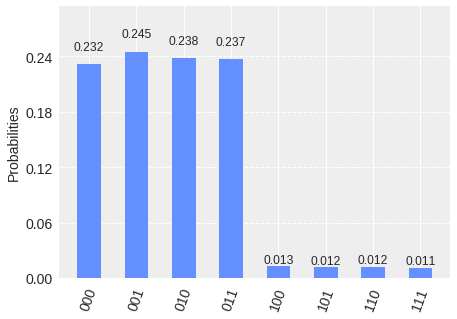

In [17]:
plot_histogram(counts1)

Now, the analysis of the results of the teleportation can be performed. 

First, the statevector_simulator is used to see the state that the 'message' qubit was prepared in. 

In [0]:
backend1 = BasicAer.get_backend("statevector_simulator")

In [0]:
qr = QuantumRegister(1)
qc = QuantumCircuit(qr,cr)

In [0]:
qc.u3(pi/7,13*pi/4,0,qr[0])
job = execute(qc,backend=backend1)

In [21]:
res = job.result()
message = res.get_statevector(qc,decimals=3)
message

array([ 0.975+0.j   , -0.157-0.157j])

The above state vector represents the original superposition that the 'message' qubit was placed in. 

In [0]:
from numpy import abs

In [25]:
prob0=(abs(message[0]))**2
prob0

0.9506249999999999

In [26]:
prob1=(abs(message[1]))**2
prob1

0.049297999999999995

Summing over the probablities of the third qubit, after the teleportation has been performed, yields:

In [29]:
prob_bob_0=0.232+0.245+0.238+0.237
prob_bob_0

0.952

In [30]:
prob_bob_1=0.013+0.012+0.012+0.011
prob_bob_1

0.048

here we see that the probabiliies of the last qubit being 0 or 1 match the initial probabilties of the first qubit, hence we have teleported the message.